In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data',
                     train=True,
                     transform=transforms.ToTensor(),
                     download=True)

In [3]:
len(train_dataset)

60000

In [5]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
type(train_dataset[0])

tuple

In [7]:
#Input Matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [8]:
#Label
train_dataset[0][1]

tensor(5)

 ## Displaying MNIST

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [11]:
show_img=train_dataset[0][0].numpy().reshape(28,28)

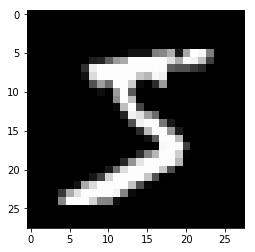

In [12]:
plt.imshow(show_img,cmap='gray')

In [13]:
#Label
train_dataset[1][1]

tensor(0)

### Loading MNIST Test Dataset

In [14]:
test_dataset=dsets.MNIST(root='./data',
                        train=False,
                        transform=transforms.ToTensor())

In [15]:
len(test_dataset)

10000

In [16]:
type(test_dataset[0])

tuple

In [17]:
#Image Matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

In [18]:
show_img=test_dataset[0][0].numpy().reshape(28,28)

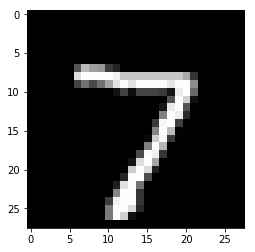

In [19]:
plt.imshow(show_img,cmap='gray')

In [20]:
#Label
test_dataset[0][1]

tensor(7)

### Make DataSet Iterable

In [21]:
len(train_dataset)

60000

In [22]:
batch_size=100

In [23]:
n_iters=3000

In [24]:
num_epocs=n_iters/(len(train_dataset)/batch_size)
num_epocs=int(num_epocs)
num_epocs

5

### Create Iterable Object :Training Dataset

In [25]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                        shuffle=True)

### Check Iterability

In [26]:
import collections
isinstance(train_loader,collections.Iterable)

True

### Create Iterable Object :Training Dataset

In [27]:
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                        shuffle=False)

### Check Iterability

In [28]:
isinstance(test_loader,collections.Iterable)

True

### Building the model

In [29]:
class LogisticRegressionModel(nn.Module):
    def __init__(self,input_dims,output_dims):
        super(LogisticRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dims, output_dims)
        
    def forward(self,x):
        out = self.linear(x)
        return out

### Instantiate Model Class

In [30]:
# Size of Image
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [31]:
input_dims = 28*28
output_dims = 10

model = LogisticRegressionModel(input_dims, output_dims)

### Instantiate Loss Class

In [32]:
criterion = nn.CrossEntropyLoss()

### Instantiate Optimizer Class

In [36]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters In Depth

In [37]:
print(model.parameters())

print(len(list(model.parameters())))

#FC 1 Parameters
print(list(model.parameters())[0].size())

#FC 2 Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x0000018C3451E5C8>
2
torch.Size([10, 784])
torch.Size([10])


In [51]:
iter = 0
for epoch in range(num_epocs):
    for i,(images,labels) in enumerate(train_loader):
        #Load images as variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        #Clear gradeints w.r.t parameters
        optimizer.zero_grad()
        
        #Forward pass to outputs/logits
        outputs = model(images)
        
        #Calculate Loss : Softmax--> Cross Entropy Loss
        loss = criterion(outputs, labels)
        
        #Getting gradients w.r.t parameters
        loss.backward()
        
        #Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            #Calculate Accuracy
            correct = 0
            total = 0
            
            #Iterate through dataset
            for images,labels in test_loader:
                #Load images to a Tensor Variable
                images = Variable(images.view(-1,28*28))
                
                #Forward pass only to get logits/output
                outputs=model(images)
                
                #Get predictions from the maximum value
                _,predicted = torch.max(outputs.data, 1)
                
                #Total number of labels
                total += labels.size(0)
                
                #Total Correct Predictions
                correct += (predicted ==labels).sum().item()
                
            accuracy = 100*correct/total
            
            #Print Loss
            print('Accuracy of model after: {} %, iterations : {} %'.format(iter,(100 * correct / total)))


Accuracy of model after: 500 %, iterations : 87.24 %
Accuracy of model after: 1000 %, iterations : 87.35 %
Accuracy of model after: 1500 %, iterations : 87.48 %
Accuracy of model after: 2000 %, iterations : 87.53 %
Accuracy of model after: 2500 %, iterations : 87.71 %
Accuracy of model after: 3000 %, iterations : 87.76 %
